# tinyurl.com/ANLPColab2Part1
Go to "File" -> "Save a Copy in Drive..."
This lets you create your own copy of the notebook in your Google drive, and any changes you make doesn't impact the shared notebook

## Text analysis using Python - Continued from Session 1

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

### Let's run a full pre-processing pipeline and create some visualisations for the same news data set

The first step is to install the required libraries using the pip command (if you don't have them), and import the modules from the libraries.



In [3]:
#Enable plots to be displayed in the notebook
%matplotlib inline

!pip install seaborn

import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/rodzaraya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodzaraya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading input file from a url
The alternative option is to read in the CSV from a web url (on github) and store it in a dataframe. This is a smaller dataset containing articles only from 2021 January to March.


In [4]:
url = 'https://github.com/AntonetteShibani/NLPAnalysis/blob/main/CNN_Articles_2021.csv?raw=true'
newsdf = pd.read_csv(url)

## Preliminary data inspection

We usually try to get a a sense of the data first (particularly useful for large data sets where opening in other UI based tools is not easy)

In [5]:
newsdf.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

In [6]:
#Generate descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset’s distribution
newsdf.describe()

,ID
count,1708.000000
mean,20285.044496
std,16894.328739
min,157.000000
25%,5544.250000
50%,10812.500000
75%,41309.250000
max,43956.000000


In [7]:
#A function similar to above, but provides a random sample of rows rather than the first few.
newsdf.sample(5)

,ID,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
1411,41441,"Angus Watson and Ben Westcott, CNN",2021-02-08 03:41:59+00:00,sport,tennis,https://www.cnn.com/2021/02/07/tennis/australi...,Australian Open 2021: After weeks of quarantin...,Thousands of tennis fans descended on Melbourn...,"tennis, Australian Open 2021: After weeks of q...","After weeks of drama and setbacks, the Austral...","Melbourne, Australia (CNN)Thousands of tennis ..."
3,399,"Ben Church, CNN",2021-03-12 11:59:44+00:00,sport,sport,https://www.cnn.com/2021/03/12/sport/esports-l...,Team Liquid: How esports has helped its fans g...,The return of sport amid the pandemic has been...,"sport, Team Liquid: How esports has helped its...",'They are like a family': How esports has help...,(CNN)The return of sport amid the pandemic ha...
266,4043,"Blake Ellis and Melanie Hicken, CNN",2021-02-01 13:02:33+00:00,news,us,https://www.cnn.com/2021/02/01/us/capitol-riot...,They stormed the Capitol to overturn the resul...,"They were there to ""stop the steal"" and to kee...","us, They stormed the Capitol to overturn the r...",They stormed the Capitol to overturn the resul...,"(CNN)They were there to ""Stop the Steal"" and ..."
1030,15864,"Elizabeth Cohen and Samira Said, CNN",2021-01-15 02:16:01+00:00,health,health,https://www.cnn.com/2021/01/14/health/pharmacy...,Pharmacy techs recruited to help get more Covi...,In an effort to speed up the slow US vaccine r...,"health, Pharmacy techs recruited to help get m...",Pharmacy techs recruited to help get more Covi...,(CNN)In an effort to speed up the slow US vac...
480,6167,"Gregory Krieg, Katie Lobosco, MJ Lee and Sara ...",2021-02-10 22:40:20+00:00,politics,politics,https://www.cnn.com/2021/02/10/politics/school...,School reopenings: Biden's 100-day plan meets ...,President Joe Biden's pledge to reopen most Am...,"politics, School reopenings: Biden's 100-day p...",Biden's 100-day plan to reopen schools meets w...,(CNN)President Joe Biden's pledge to reopen m...


## Frequently occuring words visualised in a Word cloud

Let's calculate word frequencies and display the most frequent words in a wordcloud representation.

Note that this analysis disregards the word order in the original sentence, taking a bag-of-words approach.


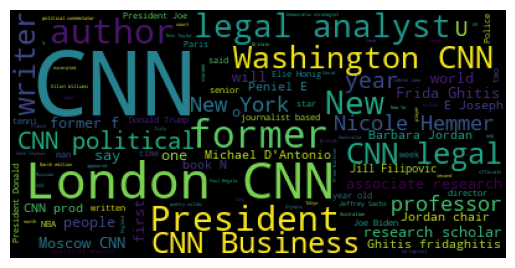

In [8]:
# converting series to string
article_text = newsdf['text'].to_string()

#create word tokens
tokenized_words=word_tokenize(article_text)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(article_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## N-gram
Let's find the most common bi-grams and tri-grams in our data set; this extends beyond unigram (single-word) analysis

In [9]:
from nltk import ngrams
from collections import Counter
import re

def get_top_ngrams(text, n, top_k=10):

    # Generate n-grams
    n_grams = list(ngrams(text, n))

    # Count the frequency of each n-gram
    n_gram_freq = Counter(n_grams)

    # Get the top k most frequent n-grams
    top_n_grams = n_gram_freq.most_common(top_k)

    return top_n_grams


# Get top 10 bigrams
top_bigrams = get_top_ngrams(tokenized_words, 2)

# Get top 10 trigrams
top_trigrams = get_top_ngrams(tokenized_words, 3)

# Print results
print("Top 10 Bigrams:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

print("\nTop 10 Trigrams:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")

Top 10 Bigrams:
('(', 'CNN'): 1071
('CNN', ')'): 1042
('is', 'a'): 256
(')', 'The'): 147
('is', 'the'): 104
('London', '('): 103
('of', 'the'): 82
(',', 'a'): 81
('a', 'CNN'): 76
(')', 'A'): 74

Top 10 Trigrams:
('(', 'CNN', ')'): 1042
('CNN', ')', 'The'): 144
('London', '(', 'CNN'): 103
('CNN', ')', 'A'): 73
('is', 'a', 'CNN'): 60
('CNN', ')', 'It'): 38
('is', 'the', 'author'): 36
('the', 'author', 'of'): 36
('Washington', '(', 'CNN'): 32
('author', 'of', 'the'): 32


## Collocations
It is also quite useful to find the most common words that co-occur. These two or three words that occur together are also known as BiGrams and TriGrams, but collocations are more meaningful than them.


In [10]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokenized_words)

#Using PMI scores to quantify and rank the BiGrams
finder.nbest(bigram_measures.pmi, 20)

[('%', 'rate'),
 ('....', '843'),
 ('10-month-old', 'Hassan'),
 ('1020', 'Rio'),
 ('1056', 'Palisade'),
 ('1176', 'Croydon'),
 ('1184', 'Lamezia'),
 ('1192', 'Cork'),
 ('1289', 'Already'),
 ('1292', 'Czech'),
 ('1321', 'Men'),
 ('1340', 'Basingstoke'),
 ('1356', 'Canberra'),
 ('1369', 'Editor'),
 ('1388', 'LondonBritish'),
 ('1411', 'Melbourne'),
 ('1446', 'Cambridge'),
 ('1497', 'Fukushima'),
 ('1524', '\\n\\n\\n\\nKiev'),
 ('1560', 'Damir')]

## Word collocations

Let's see what the most collocated words in our text are. You can repeat the same using trigrams.

In [11]:
from nltk import BigramAssocMeasures
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokenized_words)

finder.nbest(bigram_measures.likelihood_ratio, 20)

[('(', 'CNN'),
 ('CNN', ')'),
 ('is', 'a'),
 (')', 'The'),
 ('London', '('),
 ('legal', 'analyst'),
 (')', 'A'),
 ('(', '@'),
 ('Nicole', 'Hemmer'),
 ('is', 'the'),
 ('research', 'scholar'),
 ('author', 'of'),
 ('an', 'associate'),
 ('the', 'author'),
 ('of', 'the'),
 ('associate', 'research'),
 ('Jill', 'Filipovic'),
 ('New', 'York'),
 ('Frida', 'Ghitis'),
 ('Barbara', 'Jordan')]

## Concordances

We can further look up the locations at which a given word occurs in the news articles using a concordance analysis.


In [12]:
from nltk.text import Text
textlist = Text(tokenized_words)
print(textlist)
textlist.concordance('fbi')
textlist.concordance("fbi", width=100, lines=10)

<Text: 0 Washington ( CNN ) FBI Director Christopher...>
Displaying 5 of 5 matches:
0 Washington ( CNN ) FBI Director Christopher Wray ... 1 ( CNN
who stormed ... 32 Washington ( CNN ) FBI Director Christopher Wray ... 33 ( CN
on Project ... 244 Washington ( CNN ) FBI Director Christopher Wray ... 245 ( C
he US from ... 296 Washington ( CNN ) FBI Director Christopher Wray ... 297 Eli
oys have b ... 491 Washington ( CNN ) FBI Director Chris Wray told l ... 492 ( 
Displaying 5 of 5 matches:
0 Washington ( CNN ) FBI Director Christopher Wray ... 1 ( CNN ) Whether
upporters who stormed ... 32 Washington ( CNN ) FBI Director Christopher Wray ... 33 ( CNN ) Whethe
al Deception Project ... 244 Washington ( CNN ) FBI Director Christopher Wray ... 245 ( CNN ) Olymp
 week in the US from ... 296 Washington ( CNN ) FBI Director Christopher Wray ... 297 Elie Honig is
he Proud Boys have b ... 491 Washington ( CNN ) FBI Director Chris Wray told l ... 492 ( CNN ) A sc


## Pre-processing Pipeline

You will notice that our terms have stopwords and punctuations, let's try recalculating frequencies after performing pre-processing. This time, let's so a full cleanup of text with all pre-processing steps in a pipeline.


In [13]:
# We create a TextPreprocessor class that encapsulates all the preprocessing steps. The class constructor allows for custom punctuation marks and stopwords to be added.
# Each preprocessing step is implemented as a separate method so we can define in which order they need to be called.

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

class TextPreprocessor:
    def __init__(self, custom_punctuation=None, custom_stopwords=None):
        self.punctuation = string.punctuation
        if custom_punctuation:
            self.punctuation += custom_punctuation

        self.stop_words = set(stopwords.words('english'))
        if custom_stopwords:
            self.stop_words.update(custom_stopwords)

        self.stemmer = PorterStemmer()

    def remove_punctuation(self, text):
        return ''.join([char for char in text if char not in self.punctuation])

    def add_space_after_parenthesis(self, text):
        return re.sub(r'\)', ') ', text)

    def to_lowercase(self, text):
        return text.lower()

    def remove_stopwords(self, text):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word not in self.stop_words])

    def remove_extra_whitespace(self, text): # This is to remove our CNN) problem - The space is added before punctuation removal, so it won't affect the final preprocessed text if you're removing all punctuation
        return re.sub(r'\s+', ' ', text).strip()

    def stem_words(self, text):
        words = word_tokenize(text)
        return ' '.join([self.stemmer.stem(word) for word in words])

    #Order matters - how you call these methods is how the text will be processed step-by-step
    def preprocess(self, text):
        text = self.add_space_after_parenthesis(text)
        text = self.remove_punctuation(text)
        text = self.to_lowercase(text)
        text = self.remove_stopwords(text)
        text = self.remove_extra_whitespace(text)
        text = self.stem_words(text)
        return text

[nltk_data] Downloading package punkt to /Users/rodzaraya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodzaraya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
    # Custom punctuation and stopwords
    custom_punctuation = "''""…""...""``" '"' # Add any custom punctuation marks here
    custom_stopwords = ["cnn", "'s", "a", "e", "f", "n", "us", "the"]  # Add any custom stopwords here

    # Create preprocessor
    preprocessor = TextPreprocessor(custom_punctuation, custom_stopwords)

    # Preprocess the text
    preprocessed_text = preprocessor.preprocess(article_text)

    print("Original text sample:")
    print(article_text)
    print("\nPreprocessed text sample:")
    print(preprocessed_text)

Original text sample:
0       Washington (CNN)FBI Director Christopher Wray ...
1        (CNN)Whether it's a comment about his hair or...
2        (CNN)Soaring 360 meters into the sky, the Trb...
3        (CNN)The return of sport amid the pandemic ha...
4        (CNN)"We're just tired," Will Lex Ham of New ...
5        (CNN)In the heart of Cape Town, a control roo...
6       Lagos, Nigeria (CNN)As recently as 10 years ag...
7        (CNN)It has been a deadly week in the US from...
8        (CNN)Wildfires and hurricane-force winds prod...
9        (CNN)Diving in the oceans, marine biologist E...
10      Call to Earth is a CNN initiative in partnersh...
11       (CNN)An Arizona businessman who secured more ...
12       (CNN)Black Georgians disproportionately cast ...
13       (CNN)Ahmad Al Aliwi Alissa was identified by ...
14       (CNN)A former Florida state senator who resig...
15       (CNN)His past clients say he's a scammer who ...
16      This story contains racist and derogatory 

## Let's find the most frequent words *after pre-processing* and visualise them



In [15]:
  # Get word frequencies
  def get_word_frequencies(text, top_n=10):
    words = word_tokenize(text)
    word_freq = Counter(words)
    return word_freq.most_common(top_n)

  word_freq = get_word_frequencies(preprocessed_text, top_n=20)

  print("\nTop 20 most frequent words:")
  for word, count in word_freq:
        print(f"{word}: {count}")


Top 20 most frequent words:
london: 110
former: 94
presid: 73
new: 70
analyst: 51
author: 47
trump: 45
writer: 36
journalist: 36
director: 35
legal: 35
washington: 34
year: 34
polit: 34
busi: 30
senior: 29
professor: 28
say: 26
associ: 25
base: 25


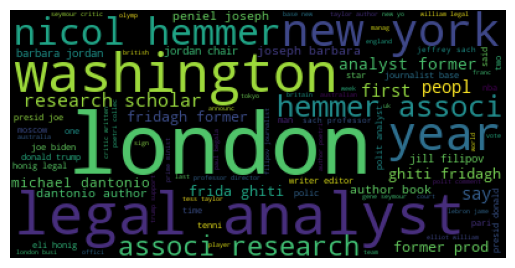

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(preprocessed_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Looks better, right?

Now, let's find frequent n-grams from our cleaned dataset


In [17]:
tokenized_words_cleaned = word_tokenize(preprocessed_text)

# Get top 10 bigrams
top_bigrams = get_top_ngrams(tokenized_words_cleaned, 2)

# Get top 10 trigrams
top_trigrams = get_top_ngrams(tokenized_words_cleaned, 3)

# Print results
print("Top 10 Bigrams:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

print("\nTop 10 Trigrams:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")

Top 10 Bigrams:
('legal', 'analyst'): 34
('new', 'york'): 20
('nicol', 'hemmer'): 20
('hemmer', 'associ'): 20
('associ', 'research'): 20
('research', 'scholar'): 20
('analyst', 'former'): 18
('frida', 'ghiti'): 16
('ghiti', 'fridagh'): 16
('fridagh', 'former'): 16

Top 10 Trigrams:
('nicol', 'hemmer', 'associ'): 20
('hemmer', 'associ', 'research'): 20
('associ', 'research', 'scholar'): 20
('legal', 'analyst', 'former'): 18
('frida', 'ghiti', 'fridagh'): 16
('ghiti', 'fridagh', 'former'): 16
('fridagh', 'former', 'prod'): 16
('michael', 'dantonio', 'author'): 16
('dantonio', 'author', 'book'): 16
('peniel', 'joseph', 'barbara'): 16


Compare results to the first list of bigrams generated. Can you spot the difference made by pre-processing?

### Let's visualise these common n-grams now

Now that we have cleaned the input text, let's calculate frequencies again to view the most common words.

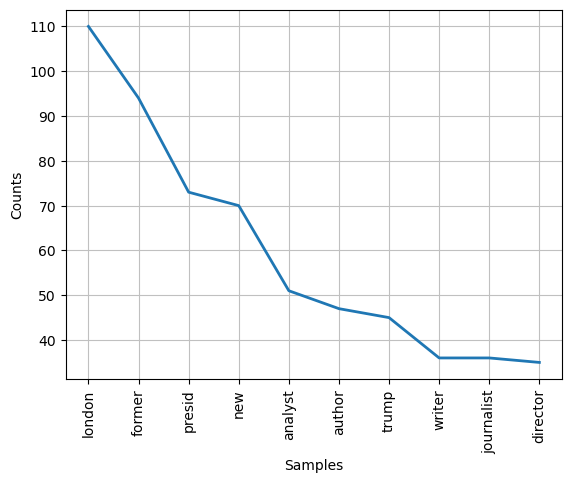

[('london', 110), ('former', 94), ('presid', 73), ('new', 70), ('analyst', 51), ('author', 47), ('trump', 45), ('writer', 36), ('journalist', 36), ('director', 35), ('legal', 35), ('washington', 34), ('year', 34), ('polit', 34), ('busi', 30), ('senior', 29), ('professor', 28), ('say', 26), ('associ', 25), ('base', 25)]


In [18]:
all_words=nltk.FreqDist(tokenized_words_cleaned)
all_words.plot(10);
print(all_words.most_common(20))

Exercise: What are the insights from here? What do the key words indicate?

### Let's create a bar chart of the most common words as well

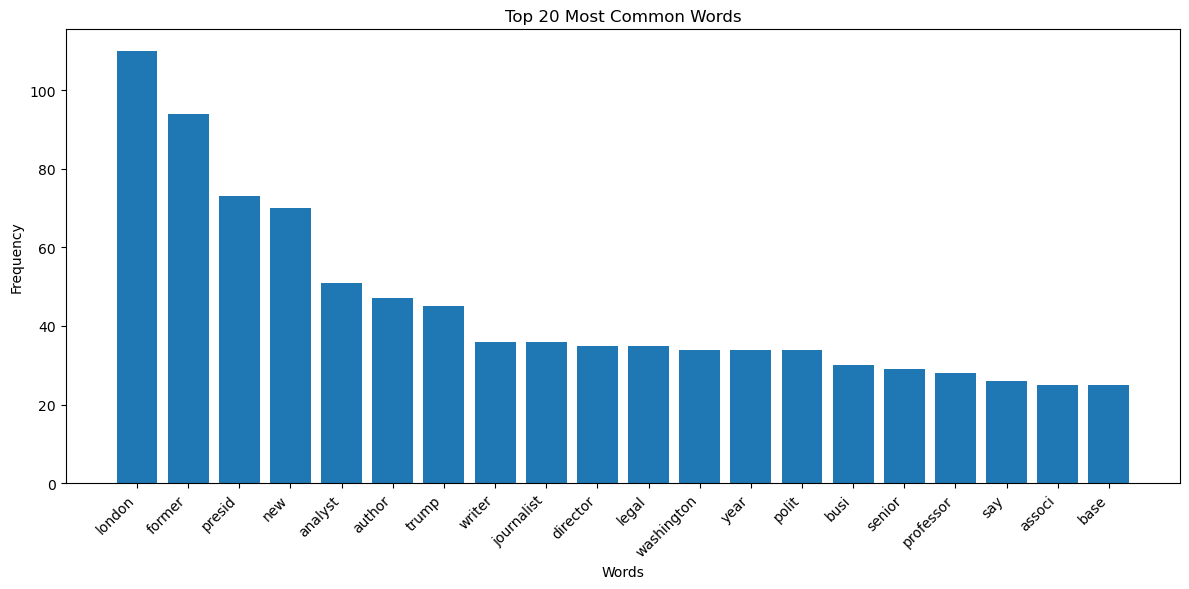

In [19]:
import matplotlib.pyplot as plt

def plot_common_words(tokens, n=20):
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(n)

    words, frequencies = zip(*common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.title(f'Top {n} Most Common Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Assuming 'tokens' is your list of tokenized words
plot_common_words(tokenized_words_cleaned)

### ...and a slightly complex Bigram Network Graph that shows the connections between words that frequently appear together

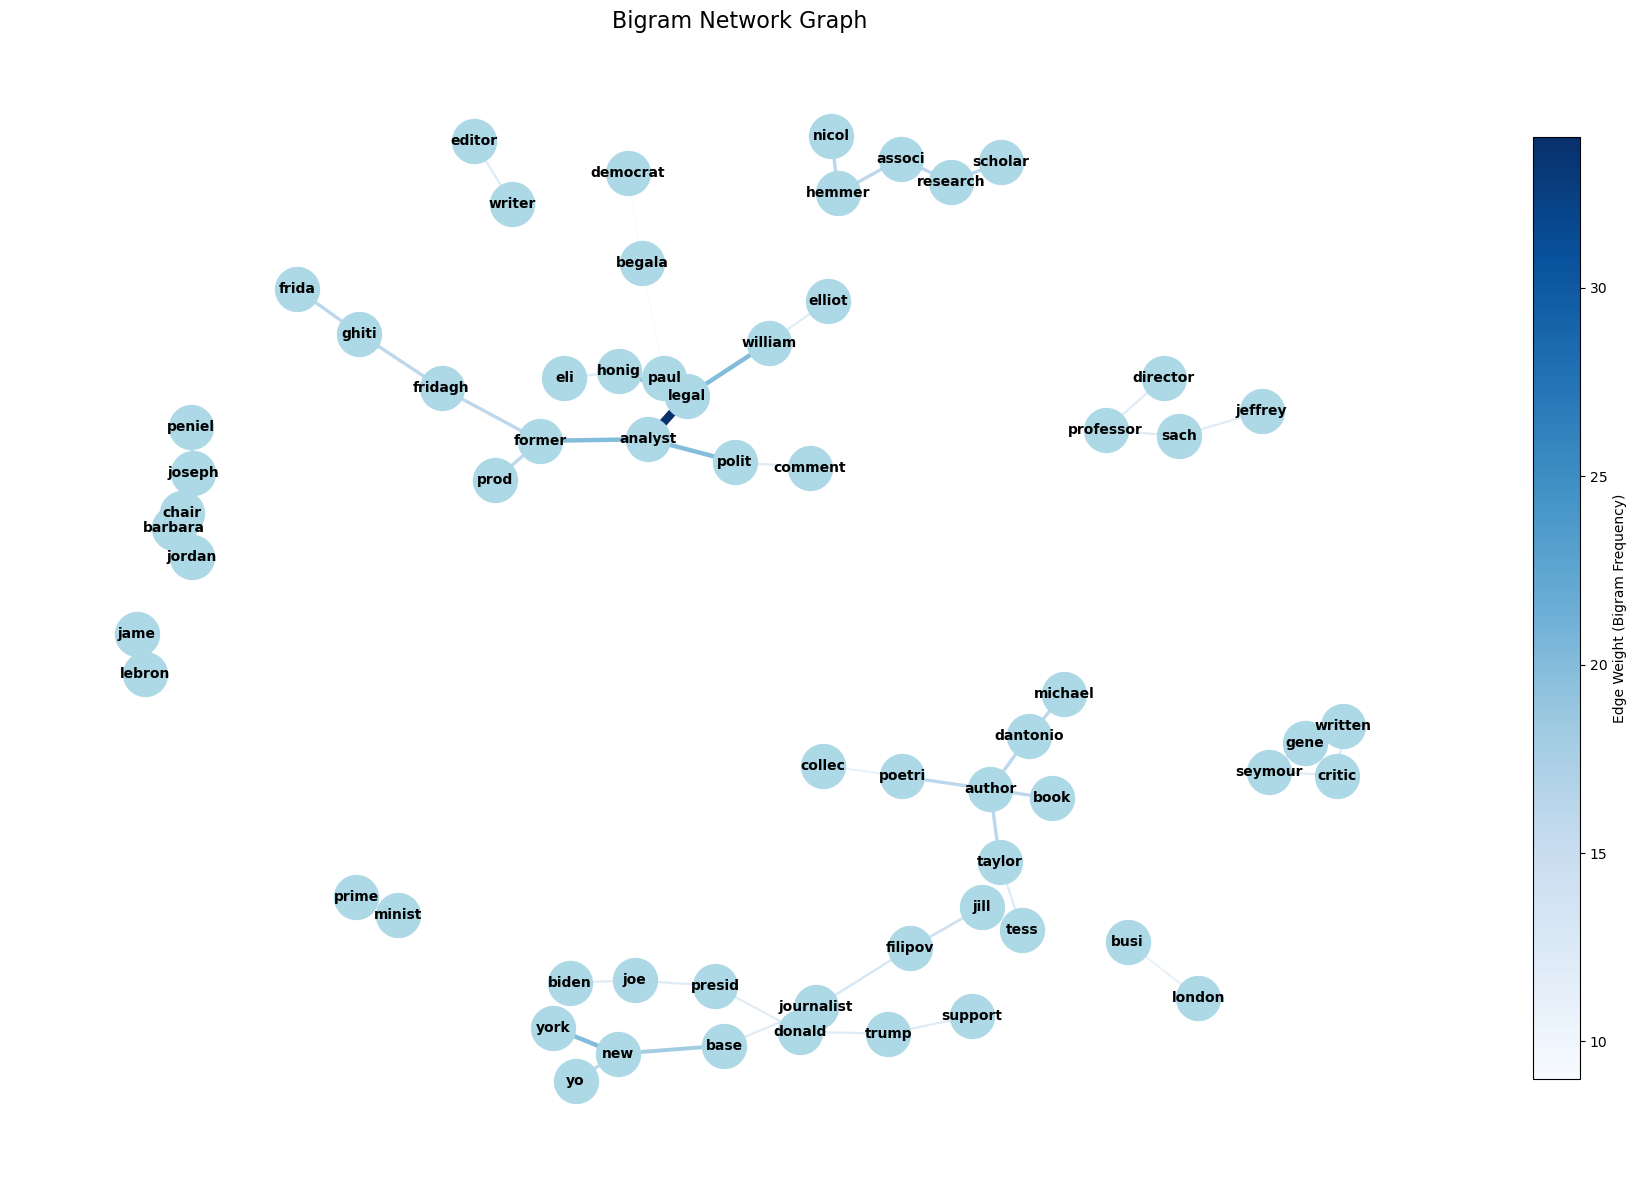

In [23]:
from nltk import bigrams
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# n=50 limits the number of bigrams to display
def plot_bigram_network(tokens, n=50):
    # Get bigrams
    bi_grams = list(bigrams(tokens))

    # Count bigram frequencies
    bigram_freq = Counter(bi_grams)

    # Create network graph
    G = nx.Graph() # Create an empty undirected graph

    # Initialize empty lists to store edge widths and colors
    edge_width = []
    edge_color = []
    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)

    # Normalize edge widths for better visualization
    edge_width = np.array(edge_width)
    edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())  # Normalize to range [1, 6]

    # Plot
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50) # Compute the position of nodes using the spring layout algorithm

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

    # Draw edges
    edges = nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # Set the title, remove the axis, and adjust the layout
    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    # Add a colorbar to show the weight scale by creating a separate axis
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
    sm.set_array([])  # Set an empty array for the colorbar
    #Fixed color bar
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical", fraction=0.03, pad=0.04)
    cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)

    plt.show()

# Input is our list of tokenized words
plot_bigram_network(tokenized_words_cleaned)